![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

# Exercícios Práticos

Crie um dataframe único com a informação do GDP e quantidade de matrículas por nível de educação por ano.

O aumento das matrículas na educação primária, secundária e terciária acompanhou o aumento do GDP per capita nos últimos 15 anos na India?

In [ ]:
import pandas as pd

In [ ]:
educ = 'https://raw.githubusercontent.com/abnr/ml-data/main/SYB61_T07_Education.csv'
gdp = 'https://raw.githubusercontent.com/abnr/ml-data/main/India_World_Bank_Info.csv'

In [ ]:
df_educ = pd.read_csv(educ, header=1,   sep = '\t', encoding='unicode_escape')
df_educ.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN,"United Nations Educational, Scientific and Cul..."


In [ ]:
df_gdp = pd.read_csv(gdp, sep='\t', on_bad_lines='error', skiprows=4)

In [ ]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386,3.773790,3.774227,3.819646,3.758949,3.588249,3.660058,3.390616,3.223699,NaN
2,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067,4.441221,4.477722,4.468985,4.431416,4.218435,4.333956,4.020842,3.735951,NaN
3,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596,3.054638,3.016158,3.119986,3.034514,2.909561,2.934533,2.712336,2.672389,NaN
4,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500000.000000,650000.000000,650000.000000,1000000.000000,526000.000000,854000.000000,612000.000000,796000.000000,806000.0


In [ ]:
# Somente a educação, ano e valores:
df_educ_formated = df_educ[["Year", "Series", "Value"]]
df_educ_formated.head()

,Year,Series,Value
0,2005,Students enrolled in primary education (thousa...,"678,990"
1,2005,Gross enrollement ratio - Primary (male),104.8
2,2005,Gross enrollment ratio - Primary (female),99.8
3,2005,Students enrolled in secondary education (thou...,"509,100"
4,2005,Gross enrollment ratio - Secondary (male),65.7


In [ ]:
# Filtrando e reorganizando o DataFrame
df_just_gdp = df_gdp.loc[df_gdp["Indicator Name"] == "GDP (current US$)"] \
                    .melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")

# Redefinindo o índice e removendo a primeira linha:
df_just_gdp = df_just_gdp.iloc[1:].reset_index(drop=True)
df_just_gdp.head()

,Country Name,Country Code,Year,GDP
0,India,IND,1960,36535925031.0
1,India,IND,1961,38709096076.0
2,India,IND,1962,41599070242.0
3,India,IND,1963,47776000900.0
4,India,IND,1964,55726873084.0


In [ ]:
df_educ_formated.dtypes

Year       int64
Series    object
Value     object
dtype: object

In [ ]:
df_educ_formated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    8162 non-null   int64 
 1   Series  8162 non-null   object
 2   Value   8162 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.4+ KB


In [ ]:
df_just_gdp.dtypes

Country Name    object
Country Code    object
Year            object
GDP             object
dtype: object

In [ ]:
df_just_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  58 non-null     object
 1   Country Code  58 non-null     object
 2   Year          58 non-null     object
 3   GDP           58 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [ ]:
# Conversão para o ano ficar em inteiro:
df_just_gdp["Year"] = df_just_gdp["Year"].astype('int64')

In [ ]:
df_just_gdp.dtypes

Country Name    object
Country Code    object
Year             int64
GDP             object
dtype: object

## Join dos DFs:

In [ ]:
gdp_and_educ = pd.merge(left=df_educ_formated, right=df_just_gdp, on=["Year"], how="inner")
gdp_and_educ.head()

,Year,Series,Value,Country Name,Country Code,GDP
0,2005,Students enrolled in primary education (thousa...,"678,990",India,IND,808901000000.0
1,2005,Gross enrollement ratio - Primary (male),104.8,India,IND,808901000000.0
2,2005,Gross enrollment ratio - Primary (female),99.8,India,IND,808901000000.0
3,2005,Students enrolled in secondary education (thou...,"509,100",India,IND,808901000000.0
4,2005,Gross enrollment ratio - Secondary (male),65.7,India,IND,808901000000.0


## Responder a pergunta:

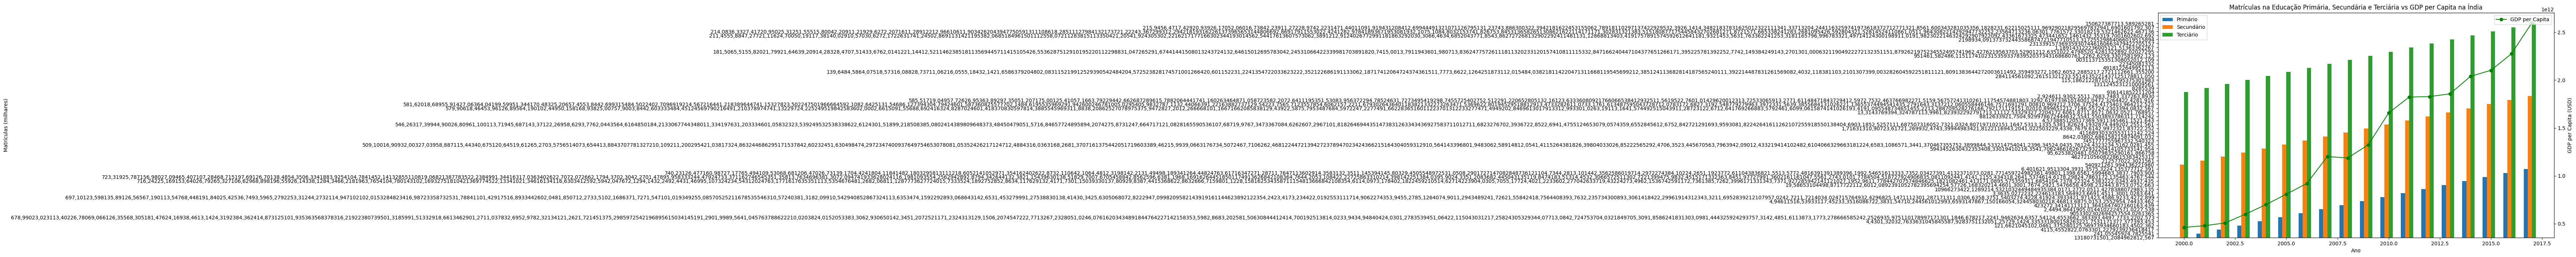

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar dados da Índia
india_data = gdp_and_educ[gdp_and_educ['Country Name'] == 'India']

# Filtrar dados por séries específicas
primary_education = india_data[india_data['Series'] == 'Students enrolled in primary education (thousands)']
secondary_education = india_data[india_data['Series'] == 'Students enrolled in secondary education (thousands)']
tertiary_education = india_data[india_data['Series'] == 'Students enrolled in tertiary education (thousands)']

# Agrupar dados por ano e calcular a média das matrículas e do GDP per capita
education_gdp = india_data.groupby('Year').agg({
    'Value': 'sum',
    'GDP': 'mean'
}).reset_index()

# Filtrar dados de matrículas para gráficos de barras
years = education_gdp['Year']
gdp = education_gdp['GDP']
primary = primary_education.groupby('Year')['Value'].sum()
secondary = secondary_education.groupby('Year')['Value'].sum()
tertiary = tertiary_education.groupby('Year')['Value'].sum()

# Plotar gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras de matrículas
ax1.bar(years - 0.3, primary, width=0.2, label='Primário')
ax1.bar(years - 0.1, secondary, width=0.2, label='Secundário')
ax1.bar(years + 0.1, tertiary, width=0.2, label='Terciário')

# Configurações do eixo y1
ax1.set_xlabel('Ano')
ax1.set_ylabel('Matrículas (milhares)')
ax1.set_title('Matrículas na Educação Primária, Secundária e Terciária vs GDP per Capita na Índia')
ax1.legend(loc='upper left')

# Eixo y2 para GDP per capita
ax2 = ax1.twinx()
ax2.plot(years, gdp, color='green', marker='o', linestyle='-', label='GDP per Capita')
ax2.set_ylabel('GDP per Capita (USD)')
ax2.legend(loc='upper right')

plt.show()
